# Foundations for statistical inference - Confidence intervals

If you have access to data on an entire population, say the opinion of every adult in the United States on whether or not they think climate change is affecting their local community, it’s straightforward to answer questions like, “What percent of US adults think climate change is affecting their local community?”. Similarly, if you had demographic information on the population you could examine how, if at all, this opinion varies among young and old adults and adults with different leanings. If you have access to only a sample of the population, as is often the case, the task becomes more complicated. What is your best guess for this proportion if you only have data from a small sample of adults? This type of situation requires that you use your sample to make inference on what your population looks like.

Setting a seed: You will take random samples and build sampling distributions in this lab, which means you should set a seed on top of your lab. If this concept is new to you, review the lab on probability.

## Getting Started

### Load packages

In [33]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_theme()

np.random.seed(0)


## The data

A 2019 Pew Research report states the following:

To keep our computation simple, we will assume a total population size of 100,000 (even though that’s smaller than the population size of all US adults).

> Roughly six-in-ten U.S. adults (62%) say climate change is currently affecting their local community either a great deal or some, according to a new Pew Research Center survey.

> __Source:__ [Most Americans say climate change impacts their community, but effects vary by region](https://www.pewresearch.org/fact-tank/2019/12/02/most-americans-say-climate-change-impacts-their-community-but-effects-vary-by-region/)

In this lab, you will assume this 62% is a true population proportion and learn about how sample proportions can vary from sample to sample by taking smaller samples from the population. We will first create our population assuming a population size of 100,000. This means 62,000 (62%) of the adult population think climate change impacts their community, and the remaining 38,000 does not think so.

In [34]:
us_adults = pd.DataFrame({"climate_change_affects": np.array(["Yes"] * 62000 + ["No"] * 38000)})


The name of the data frame is `us_adults` and the name of the variable that contains responses to the question _"Do you think climate change is affecting your local community?"_ is `climate_change_affects`.

We can quickly visualize the distribution of these responses using a bar plot.

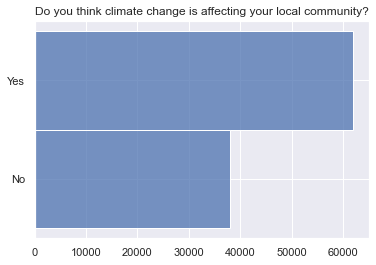

In [35]:
sns.histplot(y="climate_change_affects", data=us_adults)
plt.xlabel("")
plt.ylabel("")
plt.title("Do you think climate change is affecting your local community?")

plt.show()

We can also obtain summary statistics to confirm we constructed the data frame correctly.

In [36]:
pd.concat([us_adults.value_counts(), us_adults.value_counts() / us_adults.shape[0]], axis=1, keys=["n", "p"])


,n,p
climate_change_affects,,
Yes,62000,0.62
No,38000,0.38


In this lab, you’ll start with a simple random sample of size 60 from the population.

In [37]:
n = 60
samp = us_adults.sample(n)

### 1. What percent of the adults in your sample think climate change affects their local community? Hint: Just like we did with the population, we can calculate the proportion of those in this sample who think climate change affects their local community.

Let's see with a simple script.

In [38]:
samp[samp["climate_change_affects"] == "Yes"].shape[0] / n

0.7

### 2. Would you expect another student’s sample proportion to be identical to yours? Would you expect it to be similar? Why or why not?

No, since the samples never accurately describe a population parameter, therefore there would be no surprise if another sample holds a different parameter.

## Confidence intervals

Return for a moment to the question that first motivated this lab: based on this sample, what can you infer about the population? With just one sample, the best estimate of the proportion of US adults who think climate change affects their local community would be the sample proportion, usually denoted as p̂ (here we are calling it `p_hat`). That serves as a good __point estimate__, but it would be useful to also communicate how uncertain you are of that estimate. This uncertainty can be quantified using a __confidence interval__.

One way of calculating a confidence interval for a population proportion is based on the Central Limit Theorem, $\hat{p} \pm z * SE_{\hat{p}}$, is, or more precisely, as 

$$
\hat{p} \pm z * \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}
$$

Another way is using simulation, or to be more specific, using __bootstrapping__. The term __bootstrapping__ comes from the phrase “pulling oneself up by one’s bootstraps”, which is a metaphor for accomplishing an impossible task without any outside help. In this case the impossible task is estimating a population parameter (the unknown population proportion), and we’ll accomplish it using data from only the given sample. Note that this notion of saying something about a population parameter using only information from an observed sample is the crux of statistical inference, it is not limited to bootstrapping.

In essence, bootstrapping assumes that there are more of observations in the populations like the ones in the observed sample. So we “reconstruct” the population by resampling from our sample, with replacement. The bootstrapping scheme is as follows:

* Step 1. Take a bootstrap sample - a random sample taken __with replacement__ from the original sample, of the same size as the original sample.
* Step 2. Calculate the bootstrap statistic - a statistic such as mean, median, proportion, slope, etc. computed on the bootstrap samples.
* Step 3. Repeat steps (1) and (2) many times to create a bootstrap distribution - a distribution of bootstrap statistics.
* Step 4. Calculate the bounds of the XX% confidence interval as the middle XX% j knof the bootstrap distribution.

In [39]:
samps = [samp.sample(n, replace=True) for _ in range(1000)]
props = np.array([s[s["climate_change_affects"] == "Yes"].shape[0] / n for s in samps])
ci95 = (props.mean() - 1.96 * props.std(), props.mean() + 1.96 * props.std())

ci95 


(0.5795437087428876, 0.816322957923779)

To recap: even though we don’t know what the full population looks like, we’re 95% confident that the true proportion of US adults who think climate change affects their local community is between the two bounds reported as result of this pipeline.

## Confidence levels

### 1. In the interpretation above, we used the phrase “95% confident”. What does “95% confidence” mean?

It means that our samplings will hold a value within the confidence interval 95% of the times.

In this case, you have the rare luxury of knowing the true population proportion (62%) since you have data on the entire population.

### 1. Does your confidence interval capture the true population proportion of US adults who think climate change affects their local community? If you are working on this lab in a classroom, does your neighbor’s interval capture this value?

My estimated confidence interval does capture the true population.

### 2. Each student should have gotten a slightly different confidence interval. What proportion of those intervals would you expect to capture the true population mean? Why?

I would expect 95% of those intervals to capture the true population since 95% is the confidence level.

In the next part of the lab, you will collect many samples to learn more about how sample proportions and confidence intervals constructed based on those samples vary from one sample to another.

* Obtain a random sample.
* Calculate the sample proportion, and use these to calculate and store the lower and upper bounds of the confidence intervals.
* Repeat these steps 50 times.

### 1. Given a sample size of 60, 1000 bootstrap samples for each interval, and 50 confidence intervals constructed (the default values for the above app), what proportion of your confidence intervals include the true population proportion? Is this proportion exactly equal to the confidence level? If not, explain why. Make sure to include your plot in your answer.

The app in question can be found [here](https://openintro.shinyapps.io/confidence_intervals/). Using those parameters, we get a different number of confidence intervals not capture the true proportion each time, but this should bring no surprise since the value is around the confidence interval and, as everywhere is Statistics, we are talking about expected values.

## More Practice

### 1. Choose a different confidence level than 95%. Would you expect a confidence interval at this level to me wider or narrower than the confidence interval you calculated at the 95% confidence level? Explain your reasoning. 

The greater the confidence level, the wider the confidence interval, since we need to be more sure to get the true population value.

### 2. Using code and data fromt the one sample you have (`samp`), find a confidence interval for the proportion of US Adults who think climate change is affecting their local community with a confidence level of your choosing (other than 95%) and interpret it.

The interpretation does not change (we are just 99% confident this time, since we are using this level of confidence).

In [40]:
samps = [samp.sample(n, replace=True) for _ in range(1000)]
props = np.array([s[s["climate_change_affects"] == "Yes"].shape[0] / n for s in samps])
ci99 = (props.mean() - 2.58 * props.std(), props.mean() + 2.58 * props.std())

ci99

(0.5537700355567285, 0.8516632977766048)

### 3. Using the app, calculate 50 confidence intervals at the confidence level you chose in the previous question, and plot all intervals on one plot, and calculate the proportion of intervals that include the true population proportion. How does this percentage compare to the confidence level selected for the intervals?

This time, all the the intervals include the true population mean (except if we resample multiple times), so it is harder than before to find a confidence interval not containing the true population proportion.

### 4. Lastly, try one more (different) confidence level. First, state how you expect the width of this interval to compare to previous ones you calculated. Then, calculate the bounds of the interval using the infer package and data from samp and interpret it. Finally, use the app to generate many intervals and calculate the proportion of intervals that are capture the true population proportion.

Let's use a 90% confidence interval, which is going to be narrower.

In [41]:
samps = [samp.sample(n, replace=True) for _ in range(1000)]
props = np.array([s[s["climate_change_affects"] == "Yes"].shape[0] / n for s in samps])
ci90 = (props.mean() - 1.64 * props.std(), props.mean() + 1.64 * props.std())

ci90

(0.602978523080451, 0.7948881435862158)

The intervals not containing the true population proportion are 7 out of 50, and this is expected.

### 5. Using the app, experiment with different sample sizes and comment on how the widths of intervals change as sample size changes (increases and decreases).

In general the more confident we want to be, the larger the confidence interval will be. The greater the number of intervals the more likely it is to find intervals not containing the true population mean. The greater the sample size, and the narrower our confidence interval becomes (as the standard error decreases).

### 6. Finally, given a sample size (say, 60), how does the width of the interval change as you increase the number of bootstrap samples. __Hint__: Does changing the number of bootstap samples affect the standard error?

Changing the number of bootstrap samples does not affect the standard error. The sample size does affect the standard error.